In [1]:
import sys
sys.path.append('../ACALIB/')
%matplotlib inline
#%matplotlib qt
from acalib import *
from astropy import coordinates
from astroquery import *
from astroquery.vizier import Vizier

/Users/mauricio/anaconda/envs/jupyter/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [2]:
fits_path = '../experiments/data/'
cont=load_fits(fits_path+'Orion-CH3OH.fits')
#cont=load_fits(fits_path+"TWHydra-CO3_2.fits")
cube=cont.primary

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


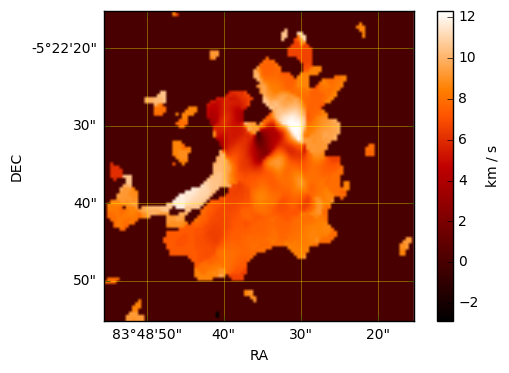

<Quantity [  8.38097917e+01, -5.37638889e+00,  2.29763161e+11] deg>

In [3]:
#visualize(moment2(cube))
myrms=noise_level(cube)
cube.data[cube.data<myrms.value]=0
visualize(moment1(cube))
# Function
v=cube.wcs.wcs_pix2world([[0,0,0],np.array(cube.data.shape)[::-1]],0)
fov=np.abs(v[1]-v[0])
cen=cube.wcs.wcs.crval
cen*u.deg

In [4]:
catalog_list = Vizier.find_catalogs(keywords=['allWISE'])
for key,item in catalog_list.items():
    print(key+" : "+item.description)
catalog_list['II/328'].tables


J/MNRAS/440/L96 : RR Lyrae AllWise photometry (Klein+, 2014)
J/ApJ/817/112 : NEOWISE/AllWISE high proper motion objects (Schneider+, 2016)
J/ApJS/224/36 : The AllWISE motion survey (AllWISE2) (Kirkpatrick+, 2016)
II/328 : AllWISE Data Release (Cutri+ 2013)
J/ApJ/783/122 : AllWISE motion survey (Kirkpatrick+, 2014)
J/ApJS/221/12 : AGNs in the MIR using AllWISE data (Secrest+, 2015)


[<Table masked=True length=0>
    _r   AllWISE RAJ2000 DEJ2000  eeMaj  ...  covW4  _2Mkey   d2M    _2M  
   arcm            deg     deg     arcs  ...                  arcs        
 float64 bytes19 float64 float64 float64 ... float64 int64  float32 bytes2
 ------- ------- ------- ------- ------- ... ------- ------ ------- ------]

In [5]:
#ra_qc="<"+str(v[0][0])+" & >"+str(v[1][0])
#dec_qc=">"+str(v[0][1])+" & <"+str(v[1][1])
#coordinates.
#print dec_qc, ra_qc
pos=coordinates.SkyCoord(cen[0]*u.deg,cen[1]*u.deg)
#print (fov*u.deg).to('arcsec')
#print cen*u.deg
tablist=Vizier.query_region(coordinates=pos,height=fov[1]*u.deg,width=fov[0]*u.deg)
#ttab=Vizier.query_constraints(catalog='II/328',RAJ2000=ra_qc,DEJ2000=dec_qc)

In [6]:
atable=tablist['I/337/gaia']
atable

_RAJ2000,_DEJ2000,_r,_x,_y,_p,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,SolID,Source,RandomI,Epoch,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NgAC,NbAL,NbAC,DQ,epsi,sepsi,APF,ARF,WAL,WAC,Apr,MatchObs,Dup,sK1,sK2,sK3,sK4,mK1,mK2,mK3,mK4,o__Gmag_,__FG_,e__FG_,__Gmag_,Var,GLON,GLAT,ELON,ELAT
deg,deg,deg,deg,deg,deg,deg,mas,deg,mas,,,,yr,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / mas2,,,,,,,,deg,deg,deg,deg,,e-/s,e-/s,mag,,deg,deg,deg,deg
float64,float64,float64,float64,float64,float64,float64,float32,float64,float32,int64,int64,int64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,float64,float32,float32,uint8,float32,float64,float32,uint8,int16,uint8,float32,float32,float32,float32,float64,float64,float64,float64,int16,float32,float32,float32,bytes13,float64,float64,float64,float64
83.804505,-5.381405,0.007272,-0.005270,-0.005011,226.4,83.8045047342,41.826,-5.3814047654,42.615,1635378410781933568,3017364028962321152,83327553,2015.0,--,--,--,--,--,--,-0.983,--,--,--,--,--,--,--,--,--,21,0,21,0,0,0,0.00,17.43,2e+04,0,67.11,0.003,--,2,12,0,0.805,0.983,0.772,0.934,-135.37971000,44.68332700,-15.38820900,44.67618000,20,2.547e+04,1566,14.510,NOT_AVAILABLE,208.9961709868,-19.3928207717,82.9659889445,-28.6695346572
83.811069,-5.376039,0.001315,0.001266,0.000355,74.3,83.8110690068,1.342,-5.3760387707,8.618,1635378410781933568,3017364127743281792,72201442,2015.0,--,--,--,--,--,--,-0.962,--,--,--,--,--,--,--,--,--,91,0,91,0,0,0,0.00,0.99,6.6e+02,0,9.69,1.002,--,2,13,0,0.501,0.192,0.718,0.866,174.84042000,-50.49774000,-3.05248620,43.85484300,92,1.12e+05,463.5,12.902,NOT_AVAILABLE,208.9942321616,-19.3845648539,82.9737274593,-28.6644946603
83.812156,-5.377557,0.002620,0.002348,-0.001163,116.4,83.8121558452,0.786,-5.3775571684,4.122,1635378410781933568,3017364127743283584,1131985067,2015.0,--,--,--,--,--,--,-0.976,--,--,--,--,--,--,--,--,--,117,9,117,9,0,0,0.00,0.71,4.4e+02,0,6.97,1.896,0.97,2,13,0,0.459,0.217,0.599,0.877,-178.85776000,-51.43416200,-4.46119700,42.30323800,109,1.444e+05,802.6,12.626,NOT_AVAILABLE,208.9961866077,-19.3842867950,82.9748746198,-28.6660641228
83.814075,-5.373714,0.005032,0.004259,0.002680,57.8,83.8140754467,3.784,-5.3737143207,17.570,1635378410781933568,3017364127743286272,626093019,2015.0,--,--,--,--,--,--,-0.941,--,--,--,--,--,--,--,--,--,62,0,62,0,0,0,0.00,4.73,4e+03,0,45.83,0.042,--,2,10,0,0.605,0.237,0.611,0.889,-142.33734000,51.23699000,-13.21718800,42.06824500,56,4.118e+04,772.3,13.988,NOT_AVAILABLE,208.9934701885,-19.3808438614,82.9772640827,-28.6623192369
83.813939,-5.370988,0.006798,0.004123,0.005406,37.3,83.8139385619,0.460,-5.3709884643,0.519,1635378410781933568,3017364127743286400,608871127,2015.0,--,--,--,--,--,--,-0.876,--,--,--,--,--,--,--,--,--,81,0,81,0,0,0,0.00,0.90,3.6e+02,0,8.79,1.202,--,2,15,0,0.196,0.091,0.402,0.794,-103.10506000,-36.62288300,-12.23622200,-42.47374700,78,8.376e+04,2357,13.217,NOT_AVAILABLE,208.9908278840,-19.3797321532,82.9772607003,-28.6595899774
83.814527,-5.380162,0.006031,0.004709,-0.003768,128.7,83.8145274992,0.387,-5.3801619054,0.564,1635378410781933568,3017364127743287680,168985995,2015.0,--,--,--,--,--,--,-0.685,--,--,--,--,--,--,--,--,--,119,0,119,0,0,0,0.00,1.40,6.9e+02,0,10.99,0.496,--,2,14,0,0.311,0.116,0.490,0.841,-170.88666000,-44.14280700,-7.04626900,43.63497000,111,6.112e+04,499.6,13.559,NOT_AVAILABLE,208.9997815303,-19.3833593922,82.9774174561,-28.6687811093
83.808696,-5.376809,0.001172,-0.001096,-0.000414,249.3,83.8086964537,0.564,-5.3768086086,0.855,1635378410781933568,3017364132041551872,760379100,2015.0,--,--,--,--,--,--,-0.704,--,--,--,--,--,--,--,--,--,105,0,105,0,0,0,0.00,1.97,1.5e+03,0,7.64,0.255,--,2,14,0,0.375,0.026,0.503,0.866,-164.35802000,-79.44962000,-7.82131800,42.92010000,99,7.216e+04,646.4

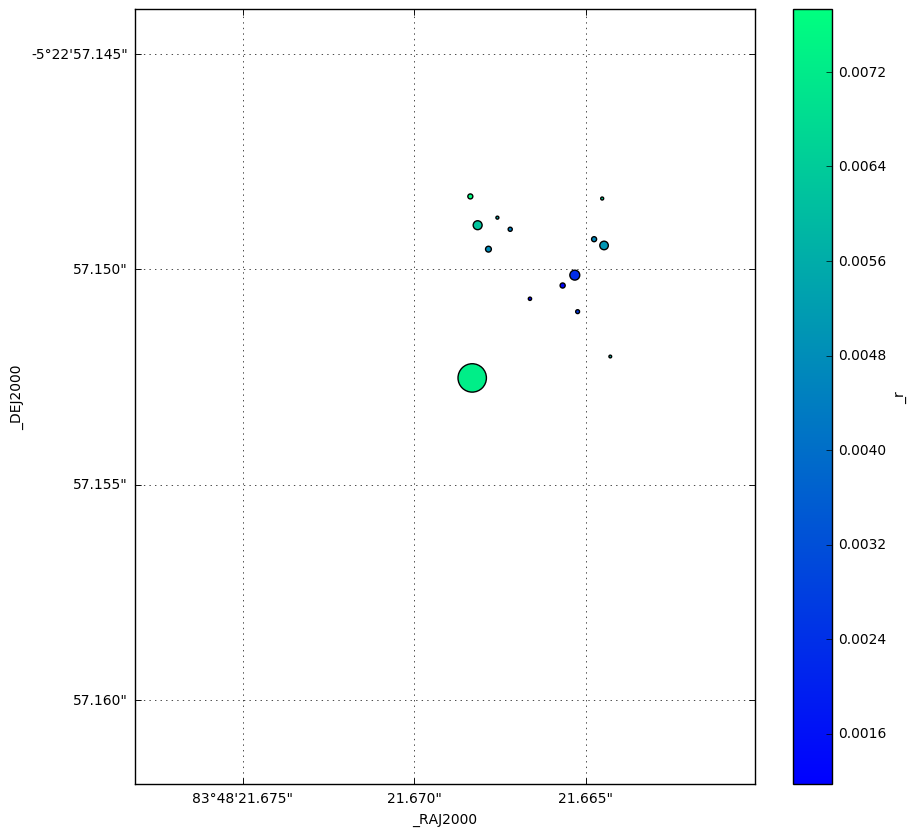

In [7]:
pn=atable.to_pandas()
ax=plt.subplot(111,projection=moment0(cube).wcs)
pn.plot(figsize=(10,10),ax=ax,x='_RAJ2000',y='_DEJ2000',kind='scatter',grid=True,c='_r',colormap="winter",s=10*pn['e_RA_ICRS'])

<IPython.core.display.Javascript object>


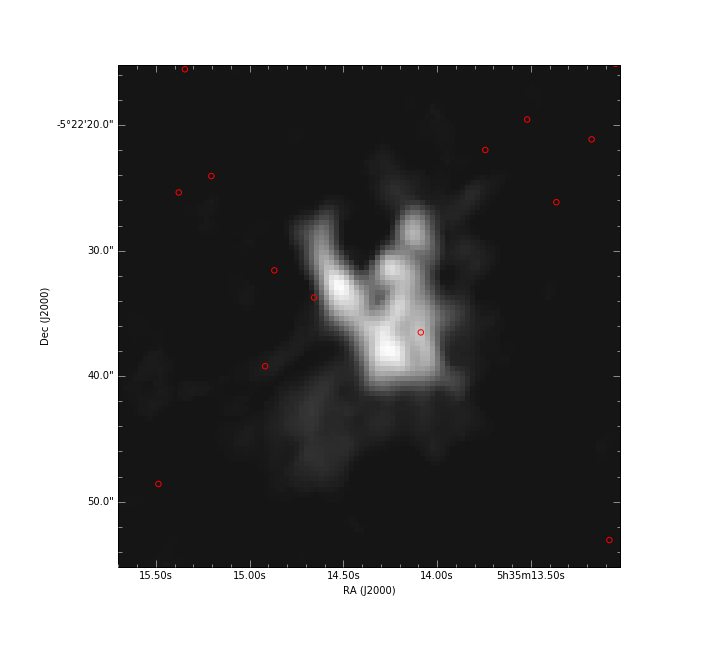

INFO: Auto-setting vmin to -9.713e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.078e+02 [aplpy.core]


<IPython.core.display.Javascript object>


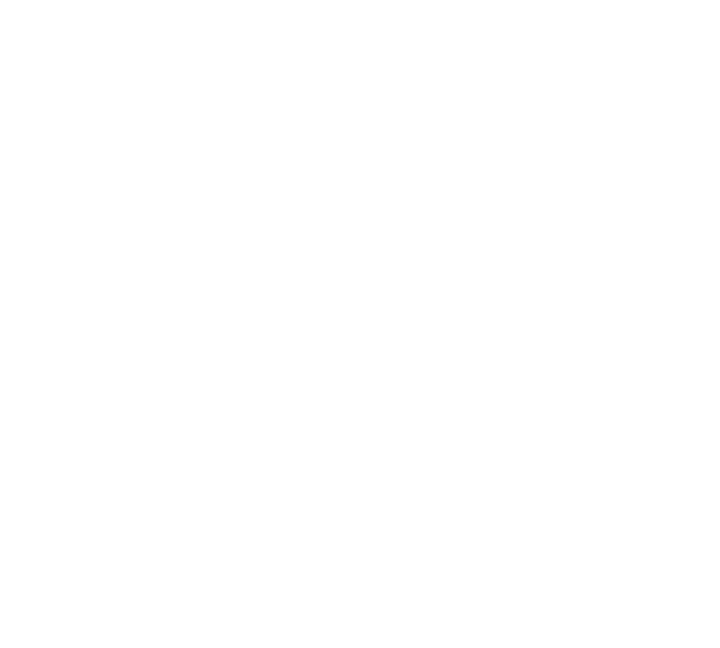

In [8]:
%matplotlib notebook
import aplpy
fig=aplpy.FITSFigure(NDData_to_HDU(moment0(cube)))
m0=moment0(cube)
m1=moment1(cube)
fig.show_grayscale()
fig.show_markers(atable['_RAJ2000'],atable['_DEJ2000'])

In [9]:
from astrodendro import *
d=Dendrogram.compute(cube.data)


ImportError: No module named 'astrodendro'

In [ ]:
d.viewer()

In [ ]:
visualize_contour3D(cube)

In [ ]:
# TODO: Epoch transformations...

#catalog_list = Vizier.find_catalogs('IRAS',max_catalogs="100000000")
catalog_list = Vizier.find_catalogs(keywords=['IRAS','point','source'])
for key,item in catalog_list.items():
    print key+" : "+item.description
mycat=catalog_list['II/125']

In [ ]:
visualize(cube,contour=True)

In [ ]:
# Spectra ready
visualize(cube.data.sum(axis=(1,2)))



In [ ]:
%matplotlib inline
contp=load_fits(fits_path+"IRAS16293-2422-HCOCH.fits")
cubep=contp.primary
visualize(np.nansum(cubep.data,axis=(1,2)))
print cubep.wcs.wcs.restfrq

In [ ]:
import astropy.vo as vo

In [ ]:
vo.